In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
import statsmodels.api as sma
from statsmodels.api import OLS
import statsmodels.formula.api as sfa
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,StackingClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [251]:
train = pd.read_csv(r"E:\EDA data\train.csv")
test = pd.read_csv(r"E:\EDA data\test.csv")

In [252]:
train.shape,test.shape

((891, 12), (418, 11))

In [253]:
combined = pd.concat([train,test],ignore_index=True)
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [255]:
combined.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [256]:
# Null value in Percentage
combined.isnull().sum()/combined.shape[0]
# More then 77% data missing in Cabin

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

## Univariate Analysis

In [257]:
num_cols=combined.select_dtypes(include=np.number).columns
cat_cols=combined.select_dtypes(object).columns
print(num_cols)
print()
print(cat_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [258]:
num_cols
# Most of records in Name columns contains unique labels so i will not consider this columns for further visulaization
# Also cabin,Ticket most of the records are unique

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [259]:
cat_cols
# Survived,Pclass,Sibsp,Parch are the categorical features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [260]:
cat_cols=['Sex','Embarked','Survived','Pclass','SibSp','Parch']
num_cols=['Age','Fare']

In [261]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [262]:
num_cols

['Age', 'Fare']

### Numerical columns

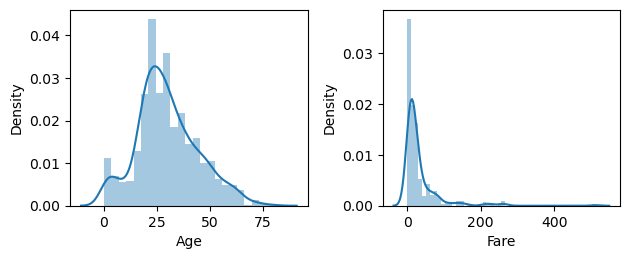

In [263]:
t = 1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.distplot(combined[i])
    t+=1
plt.tight_layout()
plt.show()

### Observation from the above distribution plot
* As we can see the ditribution of age is lokk like normal distributions and most of the passenger who are travelling are lies in the age range of 20 to 60.
* There are some passenger more then 80 age also.
* The Distribution of Fare columns is looklikes highly right/positively skewed,it means that there are some passengers who paid high amount,at Zero Fare amount the peak is high.
* So as i guess/my hpothesis ,imagine that the fare amount for which the passenger_id is zero he/she might be a staff/workers of titanic


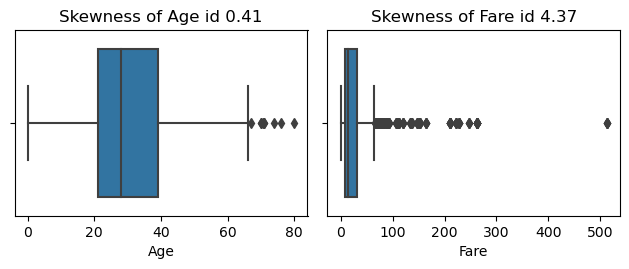

In [264]:

t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(combined[i])
    plt.title('Skewness of %s id %.2f'%(i,combined[i].skew()))
    t+=1
plt.tight_layout()
plt.show()

### Categorical columns

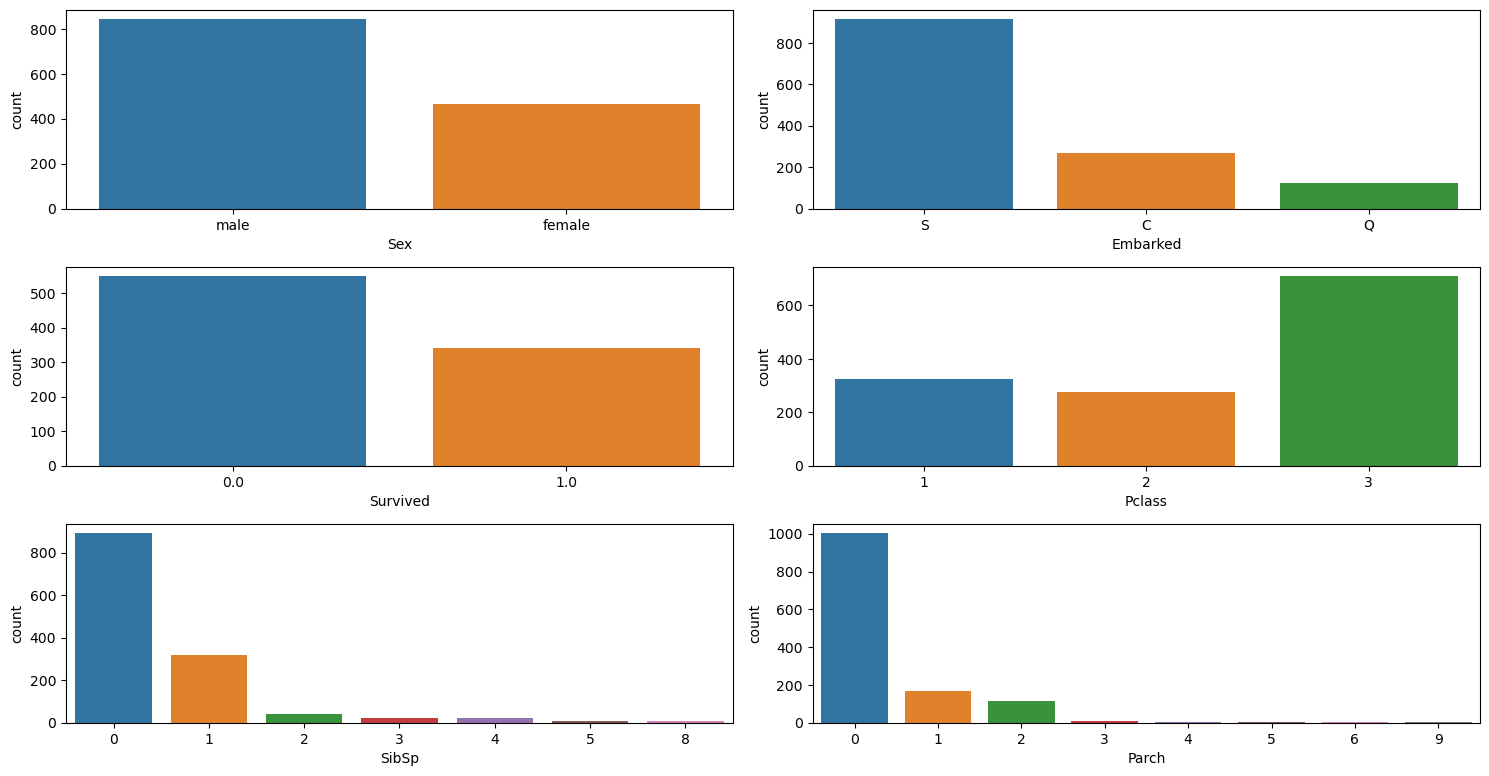

In [265]:
t = 1
plt.figure(figsize=(15,10))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(combined[i])
    t+=1
plt.tight_layout()
plt.show()

### Obseravtion from the Above Plot
* Most of the Passengers who are Travelling are Male,Here i assume/think that Most of the passenger who not survived are Male
* Most of the passengers are started there journey from southhampton/ most of the Passengers belongs to southampton
* The number of passengers who died is more than the number of passengers who survived
* Most of the passenger who are traveling are belongs to pclass3,so my hopthesis say that most of the passenger who died are belongs to pclass 3.
* Most of the passengers who are travellings are alone or i can say with one siblings or spouse and maximum sibings or spouse a traveller travel with is 8 as seen from the above plot.
* A maximum of 9 parents/children traveled along with one of the traveler.Most of the passengers/travellers are travelling alone.

## Bivariate Analysis

### Numeric VS Categoric(Tgt)

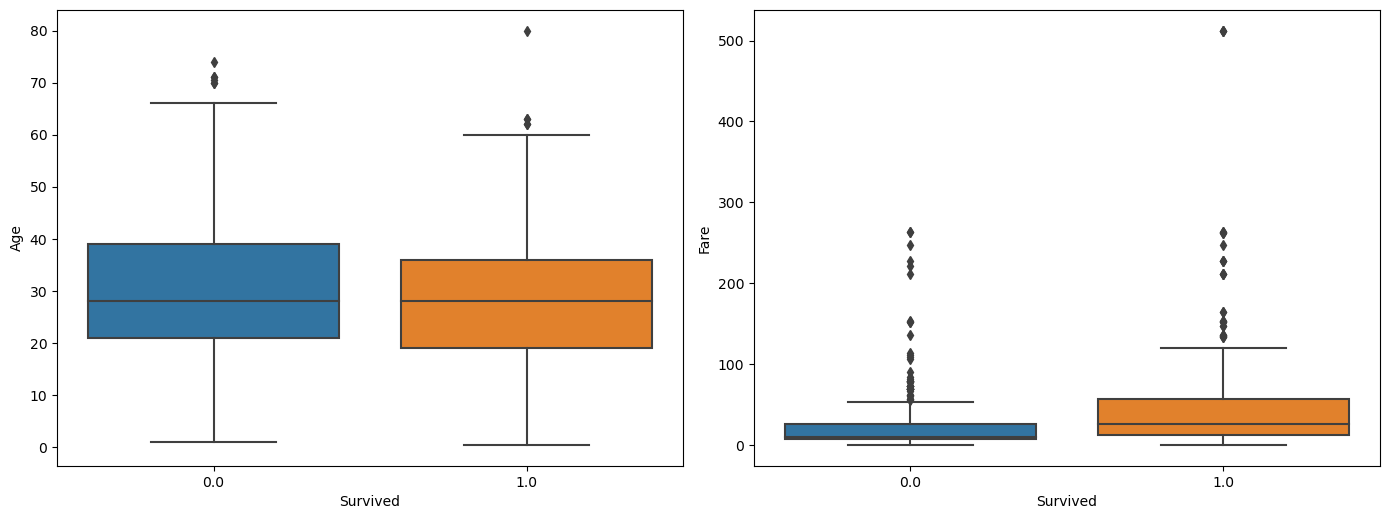

In [266]:
t=1
plt.figure(figsize=(14,10))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(combined.Survived,combined[i])
    t+=1
plt.tight_layout()
plt.show()

### Observation from the above plot

* Paseeenger who are Younger high chance to Servival as compaired to other
* Who Passenger high paid amount those people are high chance to servival

### Categoric vs Categoric(tgt)


In [267]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

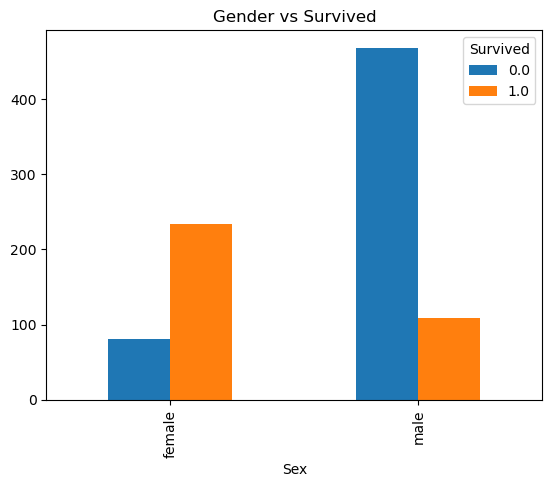

In [268]:
# Sex VS Servived
pd.crosstab(combined.Sex,combined.Survived).plot(kind='bar')
plt.title('Gender vs Survived')
plt.show()

# Female Passenger are Servived the most as compair to male

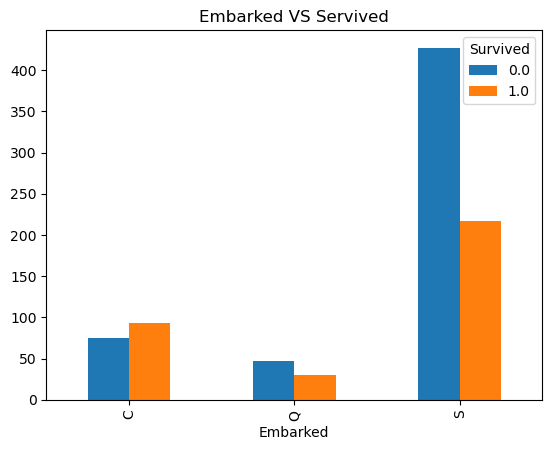

In [269]:
# Embarked VS Servived
pd.crosstab(combined.Embarked,combined.Survived).plot(kind='bar')
plt.title('Embarked VS Servived')
plt.show()

#chebourgs have high chances of survival...

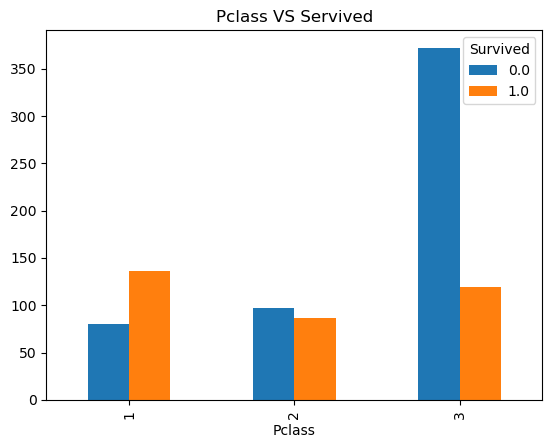

In [270]:
# Pclass VS Servived
pd.crosstab(combined.Pclass,combined.Survived).plot(kind='bar')
plt.title('Pclass VS Servived')
plt.show()

#class 3 passenger are the most who did not survived as compare to others class passenger and class 1 passenger are
#higher survival rates...

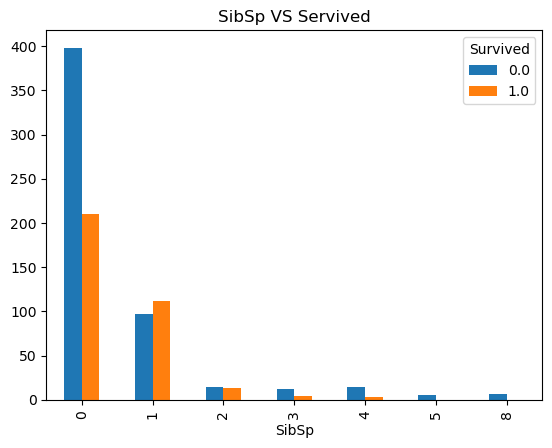

In [271]:
# SibSp VS Servived
pd.crosstab(combined.SibSp,combined.Survived).plot(kind='bar')
plt.title('SibSp VS Servived')
plt.show()

#Singles and couples are survived the most

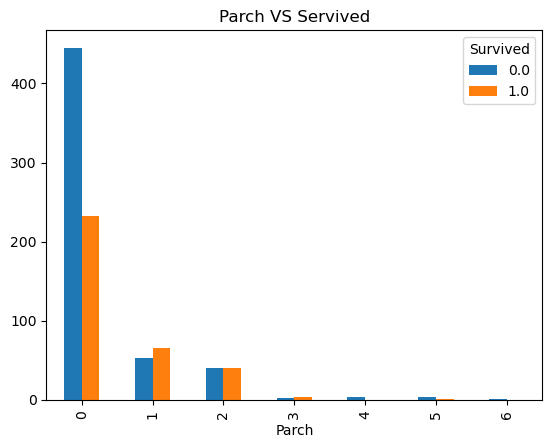

In [272]:
# Parch VS Servived
pd.crosstab(combined.Parch,combined.Survived).plot(kind='bar')
plt.title('Parch VS Servived')
plt.show()

# Solo travellers and two family members are able to survived most.....

## Missing Value

In [273]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [274]:
(combined.isnull().sum()/combined.shape[0])*100

# Approx 21% data of Age are Missing
# Approx 78% data of Cambin are Mising
# The missing value which show in survived actually it is from the test dataset and as we know in test their is no target variable
# so we will drop this columns later from the test dataset

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [275]:
combined.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [276]:
combined.groupby(['Pclass','Sex'])['Age'].describe()

count       mean        std   min   25%   50%    75%   max
Pclass Sex                                                               
1      female  133.0  37.037594  14.272460  2.00  24.0  36.0  48.00  76.0
       male    151.0  41.029272  14.578529  0.92  30.0  42.0  50.00  80.0
2      female  103.0  27.499223  12.911747  0.92  20.0  28.0  34.00  60.0
       male    158.0  30.815380  13.977400  0.67  23.0  29.5  38.75  70.0
3      female  152.0  22.185329  12.205254  0.17  16.0  22.0  30.00  63.0
       male    349.0  25.962264  11.682415  0.33  20.0  25.0  32.00  74.0

* **Lets split the Name of the passengers,as each name of the passengers contains salutation so,I can extract the salutaion and see the distribution of age accordingly .**

In [277]:
combined.Name[0].split(", ")[1].split(". ")[0]

'Mr'

In [278]:
title=[]
for i in combined.Name:
    title.append(i.split(", ")[1].split(". ")[0])

In [279]:
combined['title']=pd.Series(title)

In [280]:
combined.title

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: title, Length: 1309, dtype: object

In [281]:
# Lest see the distribution of Salutation in the dataset
combined.title.value_counts(normalize=True)

Mr              0.578304
Miss            0.198625
Mrs             0.150497
Master          0.046600
Rev             0.006112
Dr              0.006112
Col             0.003056
Mlle            0.001528
Major           0.001528
Ms              0.001528
Lady            0.000764
Sir             0.000764
Mme             0.000764
Don             0.000764
Capt            0.000764
the Countess    0.000764
Jonkheer        0.000764
Dona            0.000764
Name: title, dtype: float64

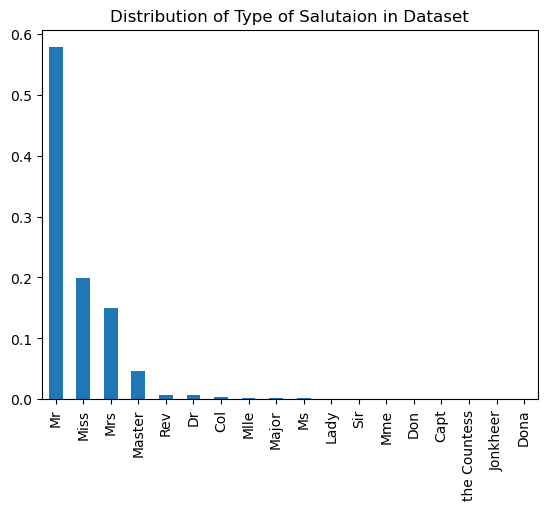

In [282]:
combined.title.value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Type of Salutaion in Dataset')
plt.show()
# So from the below plot i can say that most of the person who are travelling are Mr(Mister)>age18 and followes by Miss,Mrs,Master

In [283]:
# Now lets check the Age distribution with Respect to Title
combined.groupby('title')['Age'].describe()
# This distribution of Age Make More sense

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.00,70.0,70.00,70.0
Col,4.0,54.000000,5.477226,47.00,51.50,54.5,57.00,60.0
Don,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
Dona,1.0,39.000000,NaN,39.00,39.00,39.0,39.00,39.0
Dr,7.0,43.571429,11.731115,23.00,38.00,49.0,51.50,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.00,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.00,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.75,48.5,50.25,52.0
Master,53.0,5.482642,4.161554,0.33,2.00,4.0,9.00,14.5


In [284]:
combined.title.unique()
# There are total 18 unique title

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [285]:
title_ignore=['Don', 'Rev', 'Dr', 'Mme',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona']
len(title_ignore)

13

* **Binnig the title columns from 18 categories to 6 categories as must of the person belongs to the title (Mr,Mrs,Miss,Master,Ms) and rest of the title grouping with others category**

In [286]:
def ignore(x):
    if x in title_ignore:
        return ('Others')
    else:
        return(x)

In [287]:
combined['title']=combined.title.apply(ignore)

In [288]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [289]:
combined.groupby('title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Master,53.0,5.482642,4.161554,0.33,2.0,4.0,9.0,14.5
Miss,210.0,21.774238,12.249077,0.17,15.0,22.0,30.0,63.0
Mr,581.0,32.252151,12.422089,11.00,23.0,29.0,39.0,80.0
Mrs,170.0,36.994118,12.901767,14.00,27.0,35.5,46.5,76.0
Ms,1.0,28.000000,NaN,28.00,28.0,28.0,28.0,28.0
Others,31.0,43.129032,12.309189,23.00,32.5,45.0,52.5,70.0


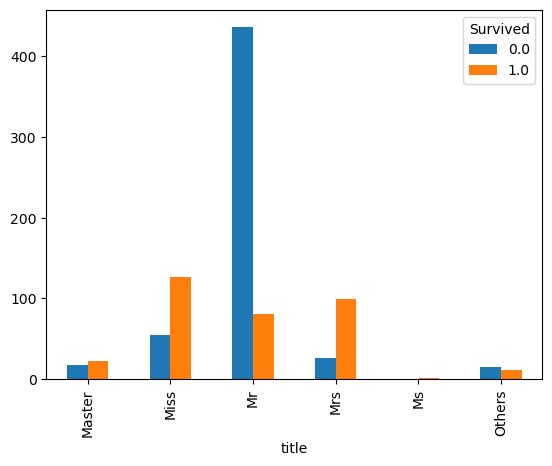

In [290]:
pd.crosstab(combined.title,combined.Survived).plot(kind='bar')
plt.show()
# Mr(Mister) Person are Died/Not Survived the Most as compares to others category

In [291]:
# Dealing with Missing value of Age as per the Titles Column
combined['Age']=combined.groupby('title')['Age'].apply(lambda x:x.fillna(x.median()))

In [292]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
title             0
dtype: int64

In [293]:
combined.loc[combined.Fare.isnull(),['Fare']]=combined.loc[(combined.title=='Mr')&(combined.Pclass==3)&(combined.Embarked=='S')]['Fare'].median()

In [294]:
##  Dealing with Missin Value of Cabin

In [295]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [296]:
combined.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [297]:
cabin_avbl=['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24', 'C90', 'C45', 'E8', 'B101', 'D45', 'C46', 'D30',
       'E121', 'D11', 'E77', 'F38', 'B3', 'D6', 'B82 B84', 'D17', 'A36',
       'B102', 'B69', 'E49', 'C47', 'D28', 'E17', 'A24', 'C50', 'B42',
       'C148', 'B45', 'B36', 'A21', 'D34', 'A9', 'C31', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C55 C57', 'C116', 'F', 'A29', 'C6', 'C28',
       'C51', 'C97', 'D22', 'B10', 'E45', 'E52', 'A11', 'B11', 'C80',
       'C89', 'F E46', 'B26', 'F E57', 'A18', 'E60', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D40', 'D38', 'C105']

In [298]:
len(cabin_avbl)
#Total 187 cabin are availabels

186

In [299]:
def available(x):
    if x in cabin_avbl:
        return ('Cabin Available')
    else:
        return('Cabin Not_Available')

In [300]:
# AS 77% of data in cabin columns are missing so we extract a new columns from cabin that is Cabin Avalability
combined['Cabin_Avalability']=combined.Cabin.apply(available)

In [301]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Cabin_Avalability
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Cabin Not_Available
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cabin Available
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Cabin Not_Available
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Cabin Available
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Cabin Not_Available


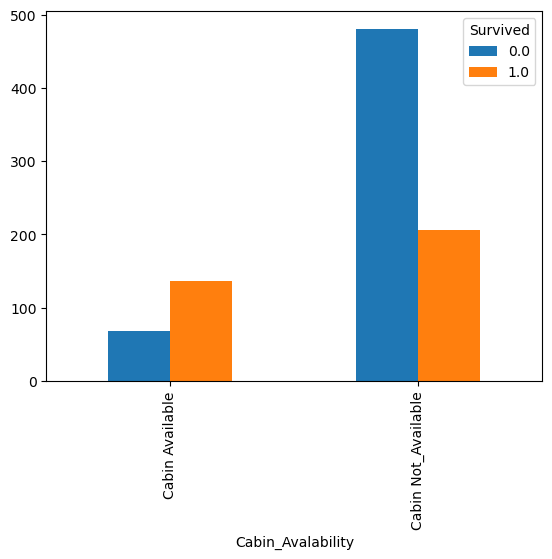

In [302]:
pd.crosstab(combined.Cabin_Avalability,combined.Survived).plot(kind='bar')
plt.show()
#Inference: Cabin_Available passengers are survived more as compare to Cabin not available Passengers

In [303]:
combined.Cabin_Avalability.value_counts()

Cabin Not_Available    1014
Cabin Available         295
Name: Cabin_Avalability, dtype: int64

In [304]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Cabin_Avalability
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Cabin Not_Available
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cabin Available
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Cabin Not_Available
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Cabin Available
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Cabin Not_Available


* In column Cabin approx 77% data are missing,so as per theory it say that if there will be any columns contains missing value more than 60% we simply drops but i am not dropping here i extract a intelligence from this and create a new columns Cabin_Avalability and Check the relation with Target it make more sense.

In [305]:
combined.isnull().sum()

PassengerId             0
Survived              418
Pclass                  0
Name                    0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                1014
Embarked                2
title                   0
Cabin_Avalability       0
dtype: int64

In [306]:
new_data=combined.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
# Drop the Unncessary columns 

In [307]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available


In [308]:
# Family
# Combine all the attributes like,SibSp,Parch
new_data['Family']=new_data.SibSp+new_data.Parch+1

In [309]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available,1


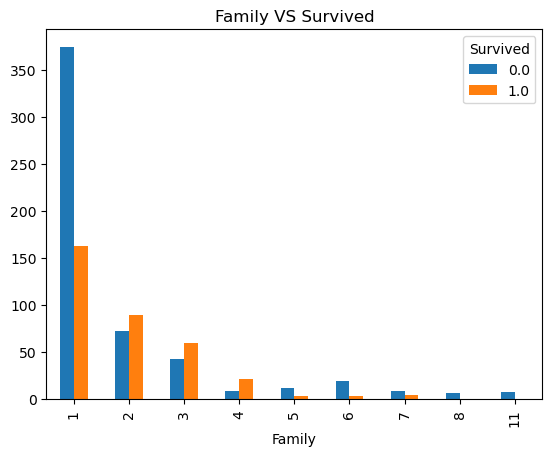

In [310]:
pd.crosstab(new_data.Family,new_data.Survived).plot(kind='bar')
plt.title('Family VS Survived')
plt.show()
# People who have travling alone and copuls are high chance to servival 

In [311]:
# Binning Family
new_data
def fam(x):
    if x>=5:
        return ('Large_Family')
    elif (x>=3):
        return ('Small_Family')
    elif (x==2):
        return ('Couples')
    else:
        return ('Singles')


In [312]:
new_data['Family_Cat']=new_data.Family.apply(fam)

In [313]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family,Family_Cat
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,2,Couples
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,2,Couples
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available,1,Singles
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available,2,Couples
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available,1,Singles


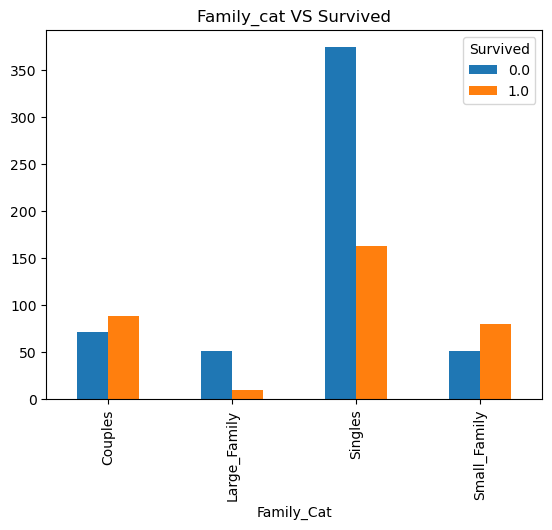

In [314]:
pd.crosstab(new_data.Family_Cat,new_data.Survived).plot(kind='bar')
plt.title('Family_cat VS Survived')
plt.show()
# Couples and Small_Family passengers are high chance of survival

In [315]:
new_data['Fare_Per_Head']=new_data.Fare/new_data.Family

In [316]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family,Family_Cat,Fare_Per_Head
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,2,Couples,3.62500
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,2,Couples,35.64165
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available,1,Singles,7.92500
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available,2,Couples,26.55000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available,1,Singles,8.05000


In [317]:
new_data[new_data.Fare==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family,Family_Cat,Fare_Per_Head
179,0.0,3,male,36.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0
263,0.0,1,male,40.0,0,0,0.0,S,Mr,Cabin Available,1,Singles,0.0
271,1.0,3,male,25.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0
277,0.0,2,male,29.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0
302,0.0,3,male,19.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0
413,0.0,2,male,29.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0
466,0.0,2,male,29.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0
481,0.0,2,male,29.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0
597,0.0,3,male,49.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0
633,0.0,1,male,29.0,0,0,0.0,S,Mr,Cabin Not_Available,1,Singles,0.0


In [318]:
new_data.isnull().sum()

Survived             418
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               2
title                  0
Cabin_Avalability      0
Family                 0
Family_Cat             0
Fare_Per_Head          0
dtype: int64

In [319]:
new_data.loc[(new_data.Pclass==3)&(new_data.title=='Mr')&(new_data.Cabin_Avalability=='Cabin Not_Available')&
       (new_data.Family_Cat=='Singles'),'Fare'].median()

7.8958

In [320]:
new_data.loc[new_data.Fare.isnull(),'Fare']=new_data.loc[(new_data.Pclass==3)&(new_data.title=='Mr')&(new_data.Cabin_Avalability=='Cabin Not_Available')&
       (new_data.Family_Cat=='Singles'),'Fare'].median()

In [321]:
new_data[new_data.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family,Family_Cat,Fare_Per_Head
61,1.0,1,female,38.0,0,0,80.0,NaN,Miss,Cabin Available,1,Singles,80.0
829,1.0,1,female,62.0,0,0,80.0,NaN,Mrs,Cabin Available,1,Singles,80.0


In [322]:
new_data.loc[(new_data.Sex=='female')&(new_data.Family_Cat=='Singles')&(new_data.Pclass==1),'Embarked'].mode()[0]

'C'

In [323]:
new_data.loc[new_data.Embarked.isnull(),'Embarked']='C'

In [324]:
new_data.isnull().sum()

Survived             418
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
title                  0
Cabin_Avalability      0
Family                 0
Family_Cat             0
Fare_Per_Head          0
dtype: int64

In [325]:
new_data.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [326]:
new_data['Magic_1']=new_data.groupby(['Sex','Embarked','title','Cabin_Avalability'])['Pclass'].transform('count')

In [327]:
new_data['Magic_2']=new_data.groupby(['Pclass','Embarked','title','Cabin_Avalability','Family_Cat'])['Fare'].transform('median')

In [328]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family,Family_Cat,Fare_Per_Head,Magic_1,Magic_2
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,2,Couples,3.62500,480,15.0250
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,2,Couples,35.64165,32,83.1583
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available,1,Singles,7.92500,123,7.9250
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available,2,Couples,26.55000,43,60.0000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available,1,Singles,8.05000,480,7.8958


In [329]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family,Family_Cat,Fare_Per_Head,Magic_1,Magic_2
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,2,Couples,3.62500,480,15.0250
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,2,Couples,35.64165,32,83.1583
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available,1,Singles,7.92500,123,7.9250
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available,2,Couples,26.55000,43,60.0000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available,1,Singles,8.05000,480,7.8958


In [330]:
new_data.corr()
# Magic_2,Fare_per_head,Fare,Pclass,Magic_1 are having good correlation with Target

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Fare_Per_Head,Magic_1,Magic_2
Survived,1.000000,-0.338481,-0.071235,-0.035322,0.081629,0.257307,0.016639,0.221600,-0.456498,0.318082
Pclass,-0.338481,1.000000,-0.391580,0.060832,0.018322,-0.558742,0.050027,-0.504336,0.336720,-0.646534
Age,-0.071235,-0.391580,1.000000,-0.214428,-0.129649,0.179632,-0.211904,0.193300,0.016422,0.192402
SibSp,-0.035322,0.060832,-0.214428,1.000000,0.373587,0.160389,0.861952,-0.089666,-0.149930,0.209397
Parch,0.081629,0.018322,-0.129649,0.373587,1.000000,0.221668,0.792296,-0.065370,-0.204599,0.288079
Fare,0.257307,-0.558742,0.179632,0.160389,0.221668,1.000000,0.226654,0.832045,-0.296807,0.763642
Family,0.016639,0.050027,-0.211904,0.861952,0.792296,0.226654,1.000000,-0.094708,-0.210445,0.295187
Fare_Per_Head,0.221600,-0.504336,0.193300,-0.089666,-0.065370,0.832045,-0.094708,1.000000,-0.213136,0.492650
Magic_1,-0.456498,0.336720,0.016422,-0.149930,-0.204599,-0.296807,-0.210445,-0.213136,1.000000,-0.352488
Magic_2,0.318082,-0.646534,0.192402,0.209397,0.288079,0.763642,0.295187,0.492650,-0.352488,1.000000


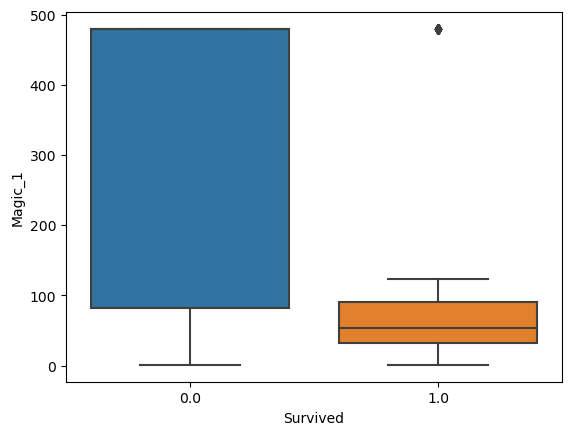

In [331]:
sns.boxplot(new_data.Survived,new_data.Magic_1)
plt.show()

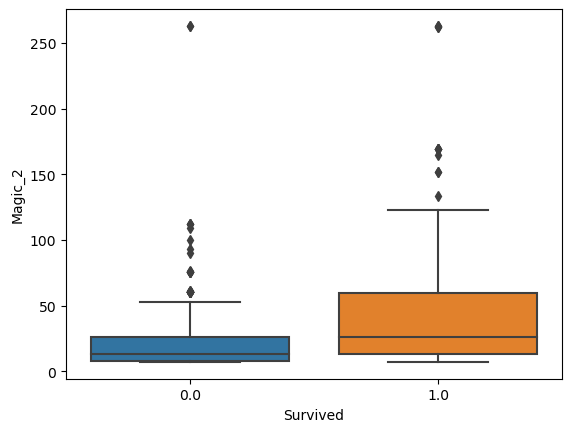

In [332]:
sns.boxplot(new_data.Survived,new_data.Magic_2)
plt.show()

In [333]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family,Family_Cat,Fare_Per_Head,Magic_1,Magic_2
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,2,Couples,3.62500,480,15.0250
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,2,Couples,35.64165,32,83.1583
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available,1,Singles,7.92500,123,7.9250
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available,2,Couples,26.55000,43,60.0000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available,1,Singles,8.05000,480,7.8958


### Lets perform Statistical Test with Target for all the features

In [334]:
new_data.nunique()

Survived               2
Pclass                 3
Sex                    2
Age                   99
SibSp                  7
Parch                  8
Fare                 281
Embarked               3
title                  6
Cabin_Avalability      2
Family                 9
Family_Cat             4
Fare_Per_Head        339
Magic_1               22
Magic_2               92
dtype: int64

In [335]:
new_data.select_dtypes(np.number).columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'Fare_Per_Head', 'Magic_1', 'Magic_2'],
      dtype='object')

In [336]:
new_data.select_dtypes(object).columns

Index(['Sex', 'Embarked', 'title', 'Cabin_Avalability', 'Family_Cat'], dtype='object')

In [337]:
num_cols=['Age','Fare','Fare_Per_Head', 'Magic_1', 'Magic_2','Family']
cat_cols=['Sex', 'Embarked', 'title', 'Cabin_Avalability',
       'Family_Cat','Pclass','Sibsp',]

### Numeric VS Target

In [338]:
# Ho: Feature is not significant
# Ha: Feature is significant
for i in num_cols:
    sample1=new_data.groupby(['Survived'])[i].apply(list)[0]
    sample2=new_data.groupby(['Survived'])[i].apply(list)[1]
    ttest,pvalue=stats.ttest_ind(sample1,sample2)
    print(i,'--------',(pvalue))
    # Except Family all features are significant with the Target

Age -------- 0.03349912645306346
Fare -------- 6.120189341924198e-15
Fare_Per_Head -------- 2.2513313600580802e-11
Magic_1 -------- 4.511072934019039e-47
Magic_2 -------- 2.1329303602597073e-22
Family -------- 0.6198911221343028


#### Categoric VS Categoric

In [339]:
for i in cat_cols:
    table=pd.crosstab(new_data.Sex,new_data.Survived)
    teststats,pvalue,dof,expected=stats.chi2_contingency(table)
    print(i,'-------------',pvalue)
# All the Features are Statistically Significant with Target

Sex ------------- 1.1973570627755645e-58
Embarked ------------- 1.1973570627755645e-58
title ------------- 1.1973570627755645e-58
Cabin_Avalability ------------- 1.1973570627755645e-58
Family_Cat ------------- 1.1973570627755645e-58
Pclass ------------- 1.1973570627755645e-58
Sibsp ------------- 1.1973570627755645e-58


In [340]:
# Drop the Insignificant columns from the Above Analysis
new_data.drop(['Family'],axis=1,inplace=True)

In [341]:
train.shape,test.shape

((891, 12), (418, 11))

In [342]:
newtrain=new_data.loc[0:train.shape[0]-1,:]

In [343]:
newtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family_Cat,Fare_Per_Head,Magic_1,Magic_2
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,Couples,3.62500,480,15.0250
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,Couples,35.64165,32,83.1583
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available,Singles,7.92500,123,7.9250
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available,Couples,26.55000,43,60.0000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available,Singles,8.05000,480,7.8958


In [344]:
newtest=new_data.loc[train.shape[0]:,:]

In [345]:
newtest.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family_Cat,Fare_Per_Head,Magic_1,Magic_2
891,NaN,3,male,34.5,0,0,7.8292,Q,Mr,Cabin Not_Available,Singles,7.829200,55,7.75000
892,NaN,3,female,47.0,1,0,7.0000,S,Mrs,Cabin Not_Available,Couples,3.500000,90,15.85000
893,NaN,2,male,62.0,0,0,9.6875,Q,Mr,Cabin Not_Available,Singles,9.687500,55,11.52915
894,NaN,3,male,27.0,0,0,8.6625,S,Mr,Cabin Not_Available,Singles,8.662500,480,7.89580
895,NaN,3,female,22.0,1,1,12.2875,S,Mrs,Cabin Not_Available,Small_Family,4.095833,90,18.05625


In [346]:
newtrain.shape,newtest.shape

((891, 14), (418, 14))

In [347]:
newtest.drop(['Survived'],axis=1,inplace=True)

In [348]:
newtrain.shape,newtest.shape

((891, 14), (418, 13))

## Scaling

In [349]:
newtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family_Cat,Fare_Per_Head,Magic_1,Magic_2
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,Couples,3.62500,480,15.0250
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,Couples,35.64165,32,83.1583
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,Cabin Not_Available,Singles,7.92500,123,7.9250
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Cabin Available,Couples,26.55000,43,60.0000
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,Cabin Not_Available,Singles,8.05000,480,7.8958


In [350]:
newtrain['Survived']=newtrain.Survived.astype('int')

In [351]:
newtrain.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cabin_Avalability,Family_Cat,Fare_Per_Head,Magic_1,Magic_2
0,0,3,male,22.0,1,0,7.2500,S,Mr,Cabin Not_Available,Couples,3.62500,480,15.0250
1,1,1,female,38.0,1,0,71.2833,C,Mrs,Cabin Available,Couples,35.64165,32,83.1583


In [352]:
# Scale the Age,Fare and Fare_per_Head,Magic_1,Magic_2
cols=['Age','Fare','Fare_Per_Head','Magic_1','Magic_2']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in cols:
    newtrain.loc[:,cols]=sc.fit_transform(newtrain.loc[:,cols])
    newtest.loc[:,cols]=sc.transform(newtest.loc[:,cols])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

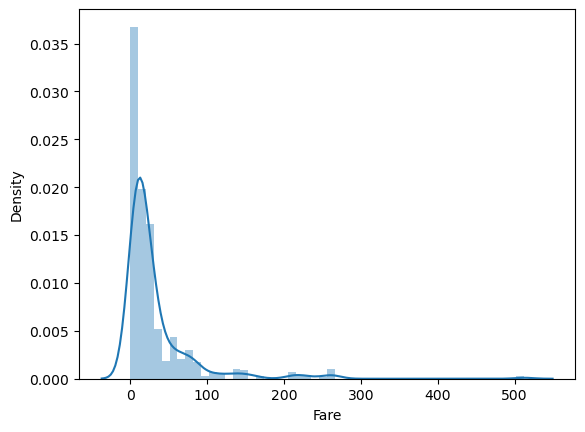

In [353]:
sns.distplot(combined.Fare)

<AxesSubplot:ylabel='Density'>

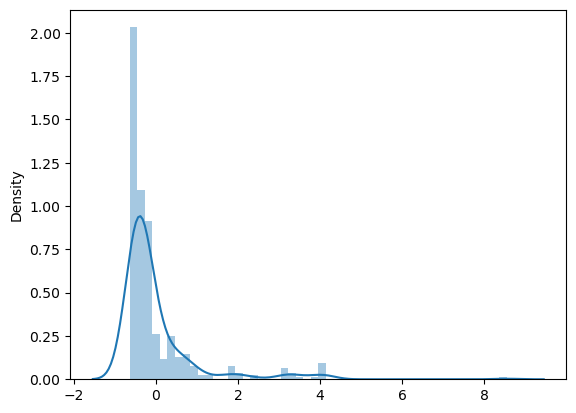

In [354]:
sns.distplot(sc.fit_transform(pd.DataFrame(newtest['Fare'])))

In [355]:
combined.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.429465,0.498854,0.385027,33.276098
std,378.020061,0.486592,0.837836,13.159685,1.041658,0.865560,51.743631
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.500000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [356]:
newtrain.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_Per_Head,Magic_1,Magic_2
count,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,2.308642,7.812681e-17,0.523008,0.381594,-4.373606e-17,-2.460932e-17,6.915531e-17,7.488710e-17
std,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,0.000000,1.000000,-2.183420e+00,0.000000,0.000000,-6.484217e-01,-5.559950e-01,-1.081510e+00,-5.996047e-01
25%,0.000000,2.000000,-5.523069e-01,0.000000,0.000000,-4.891482e-01,-3.536006e-01,-8.301961e-01,-5.800427e-01
50%,0.000000,3.000000,-2.321571e-02,0.000000,0.000000,-3.573909e-01,-3.242883e-01,-6.429428e-01,-3.825683e-01
75%,1.000000,3.000000,4.680833e-01,1.000000,0.000000,-2.424635e-02,1.046949e-01,1.278867e+00,6.862474e-02
max,1.000000,3.000000,3.831592e+00,8.000000,6.000000,9.667167e+00,1.374643e+01,1.278867e+00,6.906218e+00


In [357]:
newtest.describe()

,Pclass,Age,SibSp,Parch,Fare,Fare_Per_Head,Magic_1,Magic_2
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.028952,0.447368,0.392344,0.067586,0.051773,-0.051499,0.055014
std,0.841838,0.982886,0.896760,0.981429,1.124662,0.993924,0.985018,1.145694
min,1.000000,-2.202316,0.000000,0.000000,-0.648422,-0.555995,-1.081510,-0.628035
25%,1.000000,-0.552307,0.000000,0.000000,-0.489442,-0.342869,-0.830196,-0.580043
50%,3.000000,-0.023216,0.000000,0.000000,-0.357391,-0.314169,-0.642943,-0.370830
75%,3.000000,0.496427,1.000000,0.000000,-0.014745,0.169354,1.278867,0.068625
max,3.000000,3.529254,8.000000,9.000000,9.667167,6.768591,1.278867,6.906218


In [358]:
dummytrain=pd.get_dummies(newtrain,drop_first=True)
dummytest=pd.get_dummies(newtest,drop_first=True)

In [359]:
dummytrain.shape,dummytest.shape

((891, 21), (418, 20))

In [360]:
dummytrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_Per_Head,Magic_1,Magic_2,Sex_male,Embarked_Q,Embarked_S,title_Miss,title_Mr,title_Mrs,title_Ms,title_Others,Cabin_Avalability_Cabin Not_Available,Family_Cat_Large_Family,Family_Cat_Singles,Family_Cat_Small_Family
0,0,3,-0.552307,1,0,-0.502445,-0.454798,1.278867,-0.370830,1,0,1,0,1,0,0,0,1,0,0,0
1,1,1,0.657044,1,0,0.786845,0.438994,-0.928750,1.628602,0,0,0,0,0,1,0,0,0,0,0,0
2,1,3,-0.249969,0,0,-0.488854,-0.334757,-0.480328,-0.579186,0,0,1,1,0,0,0,0,1,0,1,0
3,1,1,0.430291,1,0,0.420730,0.185187,-0.874546,0.949001,0,0,1,0,0,1,0,0,0,0,0,0
4,0,3,0.430291,0,0,-0.486337,-0.331267,1.278867,-0.580043,1,0,1,0,1,0,0,0,1,0,1,0


In [361]:
dummytest.head()

,Pclass,Age,SibSp,Parch,Fare,Fare_Per_Head,Magic_1,Magic_2,Sex_male,Embarked_Q,Embarked_S,title_Miss,title_Mr,title_Mrs,title_Ms,title_Others,Cabin_Avalability_Cabin Not_Available,Family_Cat_Large_Family,Family_Cat_Singles,Family_Cat_Small_Family
891,3,0.392499,0,0,-0.490783,-0.337431,-0.815413,-0.584321,1,1,0,0,1,0,0,0,1,0,1,0
892,3,1.337305,1,0,-0.507479,-0.458287,-0.642943,-0.346620,0,0,1,0,0,1,0,0,1,0,0,0
893,2,2.471071,0,0,-0.453367,-0.285554,-0.815413,-0.473419,1,1,0,0,1,0,0,0,1,0,1,0
894,3,-0.174385,0,0,-0.474005,-0.314169,1.278867,-0.580043,1,0,1,0,1,0,0,0,1,0,1,0
895,3,-0.552307,1,1,-0.401017,-0.441654,-0.642943,-0.281875,0,0,1,0,0,1,0,0,1,0,0,1


### Data is ready for modelling

# Lets Build a base Model

In [362]:
X= dummytrain.drop(columns=['Survived'])
y= dummytrain.Survived

In [363]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=12,stratify=y,test_size=0.30)

In [364]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((623, 20), (268, 20), (623,), (268,))

In [365]:
xtrain_c=sma.add_constant(xtrain)
xtest_c=sma.add_constant(xtest)

In [366]:
base_model = OLS(ytrain,xtrain_c).fit()

In [367]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     28.65
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           3.86e-74
Time:                        11:53:36   Log-Likelihood:                -226.48
No. Observations:                 623   AIC:                             495.0
Df Residuals:                     602   BIC:                             588.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.6186      0.295      5.494      0.000       1.040       2.197
Pclass                                   -0.0968      0.033     -2.955      0.003      -0.161      -0.032
Age                                      -0.0359      0.018     -1.958      0.051      -0.072       0.000
SibSp                                     0.0044      0.033      0.132      0.895      -0.061       0.070
Parch                                     0.0239      0.044      0.541      0.589      -0.063       0.111
Fare                                      0.0075      0.044      0.171      0.864      -0.078       0.093
Fare_Per_Head                             0.0097      0.034      0.282      0.778      -0.058       0.077
Magic_1                                   0.0162      0.031      0.521      0.603      -0.045       0.077
Magic_2                                   0.0255      0.029      0.889      0.374      -0.031       0.082
Sex_male                                 -0.5440      0.271     -2.006      0.045      -1.077      -0.011
Embarked_Q                                0.0181      0.066      0.276      0.783      -0.111       0.147
Embarked_S                               -0.0153      0.048     -0.316      0.752      -0.110       0.080
title_Miss                               -0.6163      0.283     -2.179      0.030      -1.172      -0.061
title_Mr                                 -0.6254      0.094     -6.643      0.000      -0.810      -0.440
title_Mrs                                -0.5291      0.287     -1.845      0.065      -1.092       0.034
title_Ms                                 -0.3316      0.458     -0.724      0.469      -1.231       0.568
title_Others                             -0.5611      0.128     -4.369      0.000      -0.813      -0.309
Cabin_Avalability_Cabin Not_Available    -0.1349      0.057     -2.359      0.019      -0.247      -0.023
Family_Cat_Large_Family                  -0.5086      0.178     -2.863      0.004      -0.857      -0.160
Family_Cat_Singles                        0.0865      0.055      1.579      0.115      -0.021       0.194
Family_Cat_Small_Family                   0.0569      0.073      0.779      0.436      -0.087       0.200
==============================================================================
Omnibus:                       41.748   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.026
Skew:                           0.561   Prob(JB):                     1.13e-12
Kurtosis:                       3.927   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of 

In [368]:
y_pred_logit=base_model.predict(xtest_c)

In [369]:
y_pred_logit=pd.Series(np.where(y_pred_logit>0.50,1,0))

In [370]:
y_pred_logit.value_counts()

0    170
1     98
dtype: int64

In [371]:
# Lets check the accuracy of Base Model
print('Accuracy:',accuracy_score(ytest,y_pred_logit))

Accuracy: 0.8246268656716418


In [372]:
# Lets check the classification report
from sklearn.metrics import classification_report,f1_score,confusion_matrix
print('Classification_Report:\n',classification_report(ytest,y_pred_logit))
print('F1_score:',f1_score(ytest,y_pred_logit))

Classification_Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       165
           1       0.79      0.75      0.77       103

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

F1_score: 0.7661691542288557


### Lets Apply diffrent Machine Learning Model

In [373]:
def base_models():
    models=dict()
    models['Logistic Regression']=LogisticRegression()
    models['Decission Tree']=DecisionTreeClassifier()
    models['Random Forest']=RandomForestClassifier()
    models['Naive Bayes']=GaussianNB()
    models['KNN']=KNeighborsClassifier()
    models['Ada Boost']=AdaBoostClassifier()
    models['Xgboost']=XGBClassifier()
    models['Catboost']=CatBoostClassifier()
    models['Light gbm']=LGBMClassifier()
    models['GBM']=GradientBoostingClassifier()
    return models

In [374]:
def evaluation_score(model):
    Cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=12)
    score=cross_val_score(estimator=model,X=X,y=y,scoring='accuracy',cv=Cv,error_score='raise',n_jobs=-1)
    return score

In [375]:
models=base_models()
result,names=list(),list()
for name,model in models.items():
    finalscore=evaluation_score(model)
    result.append(finalscore)
    names.append(name)
    print('Model:',names[-1],'Mean_Score:',np.mean(result),'Variance:',np.std(result))

Model: Logistic Regression Mean_Score: 0.8260247316552632 Variance: 0.013913779169667266
Model: Decission Tree Mean_Score: 0.8024543343167411 Variance: 0.02869682407761127
Model: Random Forest Mean_Score: 0.8076977800096249 Variance: 0.025459604667967612
Model: Naive Bayes Mean_Score: 0.7974185550185173 Variance: 0.03227085400337362
Model: KNN Mean_Score: 0.7977515535747912 Variance: 0.03081460137397025
Model: Ada Boost Mean_Score: 0.8017157324294352 Variance: 0.03004859955259819
Model: Xgboost Mean_Score: 0.8043840849377225 Variance: 0.029317371973525325
Model: Catboost Mean_Score: 0.8087706358671772 Variance: 0.030979151417872358
Model: Light gbm Mean_Score: 0.8100614455394445 Variance: 0.03078301008539147
Model: GBM Mean_Score: 0.8123313037474108 Variance: 0.030148212585871033


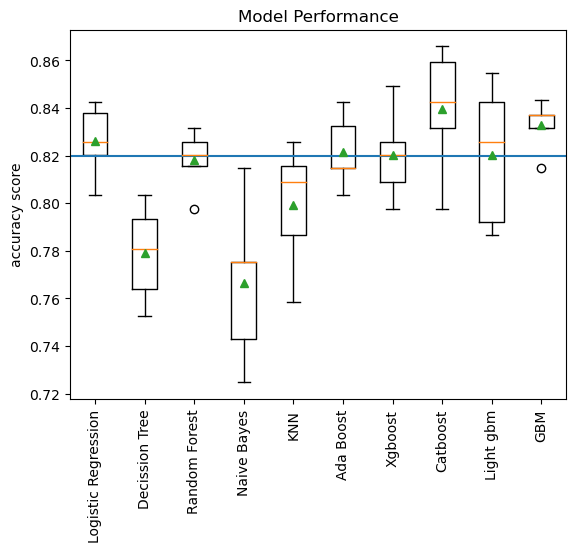

In [376]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.axhline(y=0.82)
plt.ylabel('accuracy score')
plt.title('Model Performance')
plt.show()

In [377]:
# Lets combine top 4 models,Logistic Regression,Xgboost,catboost,Light gbm

In [378]:
base=[('log_reg',LogisticRegression()),('xgb',XGBClassifier()),('lgbm',LGBMClassifier())]
final=[('catboost',CatBoostClassifier())]

In [379]:
Cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [380]:
stack=StackingClassifier(estimators=base,final_estimator=CatBoostClassifier(),cv=Cv) 

In [381]:
model_stack=stack.fit(X,y)

Learning rate set to 0.009807
0:	learn: 0.6857858	total: 167ms	remaining: 2m 47s
1:	learn: 0.6788111	total: 170ms	remaining: 1m 24s
2:	learn: 0.6718737	total: 172ms	remaining: 57.1s
3:	learn: 0.6654531	total: 174ms	remaining: 43.3s
4:	learn: 0.6588398	total: 176ms	remaining: 35s
5:	learn: 0.6525838	total: 178ms	remaining: 29.6s
6:	learn: 0.6463383	total: 181ms	remaining: 25.7s
7:	learn: 0.6401280	total: 183ms	remaining: 22.7s
8:	learn: 0.6342333	total: 185ms	remaining: 20.4s
9:	learn: 0.6285755	total: 187ms	remaining: 18.5s
10:	learn: 0.6229949	total: 189ms	remaining: 17s
11:	learn: 0.6174131	total: 191ms	remaining: 15.7s
12:	learn: 0.6120732	total: 193ms	remaining: 14.7s
13:	learn: 0.6068155	total: 195ms	remaining: 13.7s
14:	learn: 0.6018925	total: 197ms	remaining: 12.9s
15:	learn: 0.5969722	total: 199ms	remaining: 12.3s
16:	learn: 0.5918990	total: 202ms	remaining: 11.7s
17:	learn: 0.5871567	total: 204ms	remaining: 11.2s
18:	learn: 0.5824771	total: 207ms	remaining: 10.7s
19:	learn: 0.

184:	learn: 0.3689385	total: 580ms	remaining: 2.55s
185:	learn: 0.3686933	total: 583ms	remaining: 2.55s
186:	learn: 0.3684093	total: 585ms	remaining: 2.54s
187:	learn: 0.3681449	total: 587ms	remaining: 2.53s
188:	learn: 0.3678771	total: 590ms	remaining: 2.53s
189:	learn: 0.3676623	total: 592ms	remaining: 2.52s
190:	learn: 0.3673173	total: 595ms	remaining: 2.52s
191:	learn: 0.3671264	total: 597ms	remaining: 2.51s
192:	learn: 0.3669290	total: 600ms	remaining: 2.51s
193:	learn: 0.3667183	total: 602ms	remaining: 2.5s
194:	learn: 0.3663355	total: 605ms	remaining: 2.5s
195:	learn: 0.3661335	total: 608ms	remaining: 2.49s
196:	learn: 0.3659548	total: 610ms	remaining: 2.49s
197:	learn: 0.3657696	total: 613ms	remaining: 2.48s
198:	learn: 0.3655192	total: 616ms	remaining: 2.48s
199:	learn: 0.3651999	total: 619ms	remaining: 2.47s
200:	learn: 0.3650166	total: 622ms	remaining: 2.47s
201:	learn: 0.3647001	total: 624ms	remaining: 2.47s
202:	learn: 0.3644695	total: 627ms	remaining: 2.46s
203:	learn: 0.

419:	learn: 0.3300418	total: 1.15s	remaining: 1.59s
420:	learn: 0.3299483	total: 1.15s	remaining: 1.58s
421:	learn: 0.3297680	total: 1.15s	remaining: 1.58s
422:	learn: 0.3295493	total: 1.16s	remaining: 1.58s
423:	learn: 0.3294051	total: 1.16s	remaining: 1.57s
424:	learn: 0.3293255	total: 1.16s	remaining: 1.57s
425:	learn: 0.3292545	total: 1.16s	remaining: 1.57s
426:	learn: 0.3290151	total: 1.17s	remaining: 1.56s
427:	learn: 0.3288769	total: 1.17s	remaining: 1.56s
428:	learn: 0.3288146	total: 1.17s	remaining: 1.56s
429:	learn: 0.3287393	total: 1.17s	remaining: 1.55s
430:	learn: 0.3285569	total: 1.18s	remaining: 1.55s
431:	learn: 0.3283671	total: 1.18s	remaining: 1.55s
432:	learn: 0.3282883	total: 1.18s	remaining: 1.55s
433:	learn: 0.3282343	total: 1.18s	remaining: 1.54s
434:	learn: 0.3281263	total: 1.19s	remaining: 1.54s
435:	learn: 0.3279624	total: 1.19s	remaining: 1.54s
436:	learn: 0.3278030	total: 1.19s	remaining: 1.53s
437:	learn: 0.3277091	total: 1.19s	remaining: 1.53s
438:	learn: 

599:	learn: 0.3071951	total: 1.53s	remaining: 1.02s
600:	learn: 0.3071691	total: 1.53s	remaining: 1.02s
601:	learn: 0.3069949	total: 1.53s	remaining: 1.01s
602:	learn: 0.3068373	total: 1.53s	remaining: 1.01s
603:	learn: 0.3067089	total: 1.54s	remaining: 1.01s
604:	learn: 0.3065804	total: 1.54s	remaining: 1s
605:	learn: 0.3064745	total: 1.54s	remaining: 1s
606:	learn: 0.3063613	total: 1.54s	remaining: 1s
607:	learn: 0.3061607	total: 1.55s	remaining: 998ms
608:	learn: 0.3060951	total: 1.55s	remaining: 995ms
609:	learn: 0.3059950	total: 1.55s	remaining: 993ms
610:	learn: 0.3058751	total: 1.55s	remaining: 990ms
611:	learn: 0.3057749	total: 1.56s	remaining: 988ms
612:	learn: 0.3055710	total: 1.56s	remaining: 985ms
613:	learn: 0.3055176	total: 1.56s	remaining: 982ms
614:	learn: 0.3053924	total: 1.56s	remaining: 979ms
615:	learn: 0.3052632	total: 1.57s	remaining: 976ms
616:	learn: 0.3052073	total: 1.57s	remaining: 974ms
617:	learn: 0.3050833	total: 1.57s	remaining: 971ms
618:	learn: 0.3049300

775:	learn: 0.2850234	total: 1.91s	remaining: 552ms
776:	learn: 0.2848361	total: 1.91s	remaining: 550ms
777:	learn: 0.2847558	total: 1.92s	remaining: 547ms
778:	learn: 0.2846024	total: 1.92s	remaining: 545ms
779:	learn: 0.2845289	total: 1.92s	remaining: 542ms
780:	learn: 0.2843612	total: 1.92s	remaining: 540ms
781:	learn: 0.2842749	total: 1.93s	remaining: 537ms
782:	learn: 0.2840718	total: 1.93s	remaining: 535ms
783:	learn: 0.2840189	total: 1.93s	remaining: 532ms
784:	learn: 0.2838521	total: 1.93s	remaining: 530ms
785:	learn: 0.2837426	total: 1.94s	remaining: 527ms
786:	learn: 0.2836548	total: 1.94s	remaining: 525ms
787:	learn: 0.2835461	total: 1.94s	remaining: 522ms
788:	learn: 0.2834706	total: 1.94s	remaining: 520ms
789:	learn: 0.2832298	total: 1.95s	remaining: 517ms
790:	learn: 0.2831289	total: 1.95s	remaining: 515ms
791:	learn: 0.2830468	total: 1.95s	remaining: 512ms
792:	learn: 0.2829812	total: 1.95s	remaining: 510ms
793:	learn: 0.2828081	total: 1.95s	remaining: 507ms
794:	learn: 

949:	learn: 0.2637666	total: 2.3s	remaining: 121ms
950:	learn: 0.2636304	total: 2.3s	remaining: 118ms
951:	learn: 0.2634954	total: 2.3s	remaining: 116ms
952:	learn: 0.2632925	total: 2.3s	remaining: 114ms
953:	learn: 0.2631670	total: 2.31s	remaining: 111ms
954:	learn: 0.2630707	total: 2.31s	remaining: 109ms
955:	learn: 0.2628256	total: 2.31s	remaining: 106ms
956:	learn: 0.2627580	total: 2.31s	remaining: 104ms
957:	learn: 0.2625486	total: 2.31s	remaining: 102ms
958:	learn: 0.2624452	total: 2.32s	remaining: 99.1ms
959:	learn: 0.2623233	total: 2.32s	remaining: 96.7ms
960:	learn: 0.2622434	total: 2.32s	remaining: 94.3ms
961:	learn: 0.2620972	total: 2.33s	remaining: 91.9ms
962:	learn: 0.2620423	total: 2.33s	remaining: 89.4ms
963:	learn: 0.2618721	total: 2.33s	remaining: 87ms
964:	learn: 0.2616970	total: 2.33s	remaining: 84.6ms
965:	learn: 0.2615977	total: 2.33s	remaining: 82.2ms
966:	learn: 0.2615720	total: 2.34s	remaining: 79.7ms
967:	learn: 0.2614391	total: 2.34s	remaining: 77.3ms
968:	lea

In [382]:
y_pred_stack=model_stack.predict(dummytest)

In [383]:
y_pred_stack

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [384]:
pd.Series(y_pred_stack).value_counts()

0    263
1    155
dtype: int64

In [385]:
submission=pd.read_csv(r"C:\Users\hp\Downloads\gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [387]:
submission['Survived']=y_pred_stack

In [388]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [391]:
submission.to_csv('Titanic_stacking_final.csv',index=False) #0.76315

In [392]:
cd

C:\Users\hp


###  Catboost

In [393]:
cat=CatBoostClassifier()

In [394]:
y_pred_cat=cat.fit(X,y).predict(dummytest)

Learning rate set to 0.009807
0:	learn: 0.6857783	total: 26.3ms	remaining: 26.3s
1:	learn: 0.6794196	total: 31.1ms	remaining: 15.5s
2:	learn: 0.6736209	total: 35.4ms	remaining: 11.8s
3:	learn: 0.6677049	total: 40ms	remaining: 9.96s
4:	learn: 0.6622104	total: 46.1ms	remaining: 9.17s
5:	learn: 0.6569579	total: 50.2ms	remaining: 8.32s
6:	learn: 0.6507634	total: 53.6ms	remaining: 7.6s
7:	learn: 0.6455723	total: 57.5ms	remaining: 7.13s
8:	learn: 0.6404255	total: 61.3ms	remaining: 6.75s
9:	learn: 0.6345162	total: 65.4ms	remaining: 6.48s
10:	learn: 0.6291279	total: 69.7ms	remaining: 6.27s
11:	learn: 0.6233349	total: 74ms	remaining: 6.09s
12:	learn: 0.6187475	total: 77.5ms	remaining: 5.89s
13:	learn: 0.6138842	total: 80.6ms	remaining: 5.67s
14:	learn: 0.6096821	total: 83.7ms	remaining: 5.5s
15:	learn: 0.6048131	total: 87.8ms	remaining: 5.4s
16:	learn: 0.6002395	total: 91.2ms	remaining: 5.27s
17:	learn: 0.5952174	total: 94.6ms	remaining: 5.16s
18:	learn: 0.5914873	total: 97.8ms	remaining: 5.05s

174:	learn: 0.3744619	total: 721ms	remaining: 3.4s
175:	learn: 0.3739733	total: 727ms	remaining: 3.4s
176:	learn: 0.3735041	total: 731ms	remaining: 3.4s
177:	learn: 0.3730318	total: 735ms	remaining: 3.39s
178:	learn: 0.3727622	total: 739ms	remaining: 3.39s
179:	learn: 0.3723850	total: 742ms	remaining: 3.38s
180:	learn: 0.3718626	total: 746ms	remaining: 3.38s
181:	learn: 0.3713800	total: 750ms	remaining: 3.37s
182:	learn: 0.3709408	total: 756ms	remaining: 3.38s
183:	learn: 0.3706328	total: 760ms	remaining: 3.37s
184:	learn: 0.3702640	total: 765ms	remaining: 3.37s
185:	learn: 0.3700298	total: 769ms	remaining: 3.36s
186:	learn: 0.3696196	total: 776ms	remaining: 3.38s
187:	learn: 0.3692898	total: 783ms	remaining: 3.38s
188:	learn: 0.3689275	total: 788ms	remaining: 3.38s
189:	learn: 0.3686702	total: 794ms	remaining: 3.38s
190:	learn: 0.3683638	total: 797ms	remaining: 3.38s
191:	learn: 0.3679507	total: 802ms	remaining: 3.38s
192:	learn: 0.3675392	total: 806ms	remaining: 3.37s
193:	learn: 0.3

347:	learn: 0.3351959	total: 1.49s	remaining: 2.78s
348:	learn: 0.3350771	total: 1.49s	remaining: 2.78s
349:	learn: 0.3349115	total: 1.5s	remaining: 2.78s
350:	learn: 0.3347629	total: 1.5s	remaining: 2.77s
351:	learn: 0.3346209	total: 1.5s	remaining: 2.77s
352:	learn: 0.3344625	total: 1.51s	remaining: 2.77s
353:	learn: 0.3343277	total: 1.51s	remaining: 2.76s
354:	learn: 0.3341809	total: 1.52s	remaining: 2.76s
355:	learn: 0.3339240	total: 1.52s	remaining: 2.75s
356:	learn: 0.3337958	total: 1.52s	remaining: 2.75s
357:	learn: 0.3335577	total: 1.53s	remaining: 2.74s
358:	learn: 0.3335145	total: 1.53s	remaining: 2.74s
359:	learn: 0.3334326	total: 1.53s	remaining: 2.73s
360:	learn: 0.3333101	total: 1.54s	remaining: 2.73s
361:	learn: 0.3331238	total: 1.54s	remaining: 2.72s
362:	learn: 0.3330248	total: 1.55s	remaining: 2.71s
363:	learn: 0.3327610	total: 1.55s	remaining: 2.71s
364:	learn: 0.3326792	total: 1.55s	remaining: 2.7s
365:	learn: 0.3325201	total: 1.56s	remaining: 2.7s
366:	learn: 0.332

523:	learn: 0.3117664	total: 2.21s	remaining: 2.01s
524:	learn: 0.3117377	total: 2.22s	remaining: 2.01s
525:	learn: 0.3116595	total: 2.22s	remaining: 2s
526:	learn: 0.3115160	total: 2.23s	remaining: 2s
527:	learn: 0.3114270	total: 2.23s	remaining: 1.99s
528:	learn: 0.3112656	total: 2.23s	remaining: 1.99s
529:	learn: 0.3112030	total: 2.24s	remaining: 1.99s
530:	learn: 0.3111097	total: 2.24s	remaining: 1.98s
531:	learn: 0.3110277	total: 2.25s	remaining: 1.98s
532:	learn: 0.3109814	total: 2.25s	remaining: 1.97s
533:	learn: 0.3108674	total: 2.25s	remaining: 1.97s
534:	learn: 0.3107345	total: 2.26s	remaining: 1.96s
535:	learn: 0.3106942	total: 2.26s	remaining: 1.96s
536:	learn: 0.3106303	total: 2.26s	remaining: 1.95s
537:	learn: 0.3105156	total: 2.27s	remaining: 1.95s
538:	learn: 0.3104117	total: 2.27s	remaining: 1.94s
539:	learn: 0.3103017	total: 2.28s	remaining: 1.94s
540:	learn: 0.3102456	total: 2.28s	remaining: 1.94s
541:	learn: 0.3100909	total: 2.29s	remaining: 1.93s
542:	learn: 0.3099

705:	learn: 0.2929162	total: 2.93s	remaining: 1.22s
706:	learn: 0.2928843	total: 2.93s	remaining: 1.21s
707:	learn: 0.2928194	total: 2.94s	remaining: 1.21s
708:	learn: 0.2926661	total: 2.94s	remaining: 1.21s
709:	learn: 0.2924174	total: 2.95s	remaining: 1.2s
710:	learn: 0.2921289	total: 2.95s	remaining: 1.2s
711:	learn: 0.2920336	total: 2.96s	remaining: 1.2s
712:	learn: 0.2919967	total: 2.96s	remaining: 1.19s
713:	learn: 0.2919008	total: 2.97s	remaining: 1.19s
714:	learn: 0.2916001	total: 2.97s	remaining: 1.19s
715:	learn: 0.2914303	total: 2.98s	remaining: 1.18s
716:	learn: 0.2912459	total: 2.98s	remaining: 1.18s
717:	learn: 0.2910825	total: 2.99s	remaining: 1.17s
718:	learn: 0.2910355	total: 3s	remaining: 1.17s
719:	learn: 0.2909389	total: 3s	remaining: 1.17s
720:	learn: 0.2908967	total: 3s	remaining: 1.16s
721:	learn: 0.2907467	total: 3.01s	remaining: 1.16s
722:	learn: 0.2905873	total: 3.01s	remaining: 1.15s
723:	learn: 0.2905814	total: 3.02s	remaining: 1.15s
724:	learn: 0.2903741	to

884:	learn: 0.2729202	total: 3.69s	remaining: 479ms
885:	learn: 0.2728702	total: 3.69s	remaining: 475ms
886:	learn: 0.2727917	total: 3.7s	remaining: 471ms
887:	learn: 0.2727170	total: 3.7s	remaining: 467ms
888:	learn: 0.2726173	total: 3.71s	remaining: 463ms
889:	learn: 0.2725274	total: 3.71s	remaining: 459ms
890:	learn: 0.2724547	total: 3.71s	remaining: 454ms
891:	learn: 0.2723579	total: 3.72s	remaining: 450ms
892:	learn: 0.2722284	total: 3.72s	remaining: 446ms
893:	learn: 0.2721497	total: 3.73s	remaining: 442ms
894:	learn: 0.2720784	total: 3.73s	remaining: 438ms
895:	learn: 0.2720133	total: 3.73s	remaining: 433ms
896:	learn: 0.2717580	total: 3.74s	remaining: 429ms
897:	learn: 0.2716718	total: 3.74s	remaining: 425ms
898:	learn: 0.2715970	total: 3.75s	remaining: 421ms
899:	learn: 0.2715269	total: 3.75s	remaining: 417ms
900:	learn: 0.2713631	total: 3.75s	remaining: 412ms
901:	learn: 0.2712359	total: 3.76s	remaining: 409ms
902:	learn: 0.2712116	total: 3.76s	remaining: 404ms
903:	learn: 0.

In [395]:
pd.Series(y_pred_cat).value_counts()

0    264
1    154
dtype: int64

In [396]:
submission['Survived']=y_pred_cat

In [397]:
submission.to_csv('Titanic_cat_final.csv',index=False)  #0.77033

### Logistic Regression

In [398]:
log=LogisticRegression()

In [399]:
y_pred_log=log.fit(X,y).predict(dummytest)

In [400]:
submission['Survived']=y_pred_log

In [401]:
submission.to_csv('Titanic_log_final.csv',index=False) #0.77272

* After fitting different Machine learning Model,I find out that the Tuned Logistic Regression Model give me the Highest Accuracy as comapres to others,so i will consider this will be my final model